In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import motra
import matplotlib.pyplot as plt

In [3]:
fly = motra.parse("datasets/sample-trackfeat.xls")
fly.head()

,pos x,pos y,ori,major axis len,minor axis len,body area,fg area,img contrast,min fg dist,wing l x,...,ang_vel,min_wing_ang,max_wing_ang,mean_wing_length,axis_ratio,fg_body_ratio,contrast,dist_to_wall,fly_id,timestamp
0,783.857741,542.569038,2.704636,29.120054,10.639605,239.0,660.0,0.309538,62.817196,806.0,...,0.050744,0.034302,0.039607,1.950287,2.736949,2.761506,0.309538,3.578768,1,0.0000
1,783.493878,542.587755,2.706273,29.165685,10.884344,245.0,647.0,0.326223,61.131008,806.0,...,0.070921,0.037852,0.048828,1.969268,2.704425,2.675070,0.330280,3.578768,1,0.0333
2,783.277551,542.595918,2.710513,29.367216,10.790607,245.0,651.0,0.359137,60.299255,805.0,...,0.098216,0.038118,0.075285,1.970531,2.692419,2.651685,0.340643,3.646340,1,0.0667
3,783.553279,542.569672,2.707958,28.909874,10.921876,244.0,647.0,0.318077,62.128899,805.0,...,0.114703,0.037068,0.076717,1.961779,2.670243,2.637463,0.328618,3.578768,1,0.1000
4,783.735772,542.552846,2.702509,29.171824,10.944310,246.0,637.0,0.319184,62.817196,806.0,...,0.133684,0.038944,0.061583,1.958673,2.645382,2.614129,0.320573,3.578768,1,0.1333


In [4]:
fly.dropna(subset=["pos x", "pos y"], how="all", inplace=True)

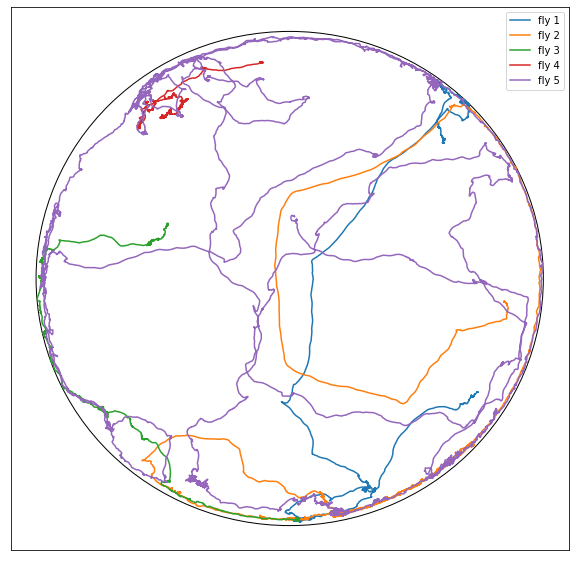

In [5]:
arena_1 = fly[fly["fly_id"] < 6] # flies that belong to arena 1. 
                                 # The dataset needs a column indicating 
                                 # which arena the fly belongs to.
center_1, radius_1 = motra.get_center_radius(arena_1)
motra.arena_trajectory(arena_1, center_1, radius_1)

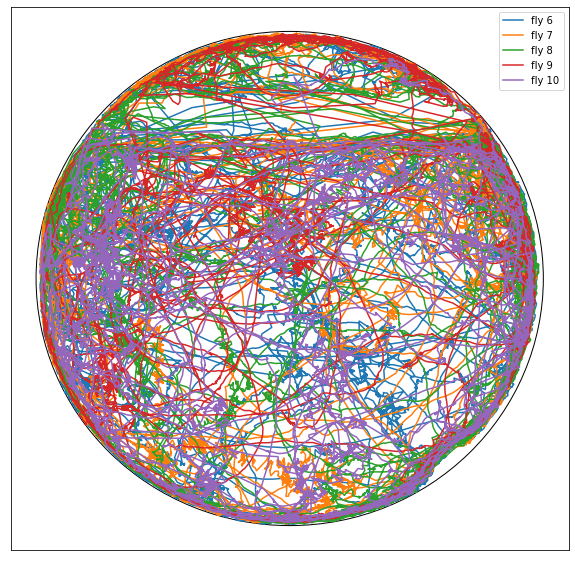

In [6]:
arena_2 = fly[fly["fly_id"] > 5] # flies that belong to arena 2. 
                                 # The dataset needs a column indicating 
                                 # which arena the fly belongs to.
center_2, radius_2 = motra.get_center_radius(arena_2)
motra.arena_trajectory(arena_2, center_2, radius_2)

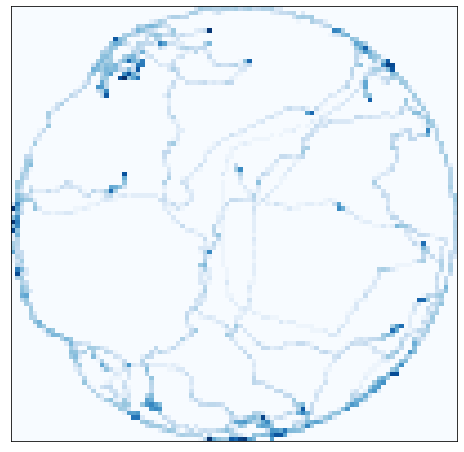

In [7]:
motra.heatmap(arena_1, center_1, radius_1, linthresh=5, cmap="Blues")

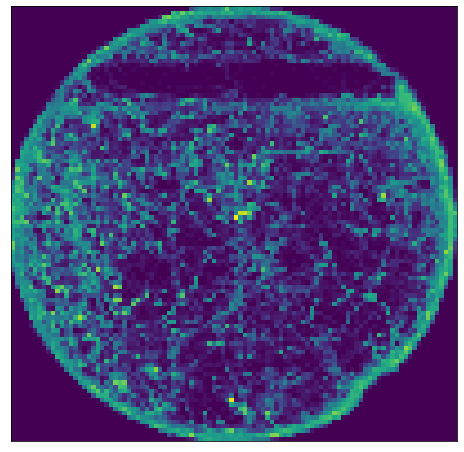

In [8]:
motra.heatmap(arena_2, center_2, radius_2, linthresh=20, cmap='viridis')

# Time distribution

In [9]:
time_distribution_by_quadrant = motra.time_distribution_by_quadrant(arena_1, center_1, radius_1)
time_distribution_by_quadrant

quadrant,1,2,3,4
fly_id,,,,
1,0.557761,0.000000,0.001279,0.440960
2,0.009286,0.000537,0.454850,0.535327
3,0.000000,0.686279,0.180062,0.133659
4,0.000000,1.000000,0.000000,0.000000
5,0.184590,0.253837,0.234217,0.327356


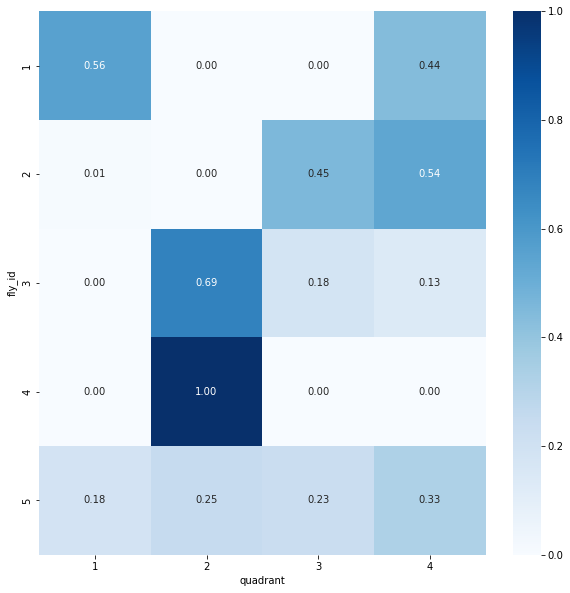

In [10]:
motra.graph_time_distribution_by_quadrant(time_distribution_by_quadrant)

In [13]:
time_dist_circle = motra.time_dist_circle([arena_2, arena_1], [center_2, center_1], 
                                            radius_1, aoi_circle_radii=[3, 7, 10, 12, 15, 19],
                                            labels=["experiment", "control"])
time_dist_circle

,Circle of radius 3mm,Circle of radius 7mm,Circle of radius 10mm,Circle of radius 12mm,Circle of radius 15mm,Circle of radius 19mm
experiment,0.035619,0.063042,0.070435,0.076487,0.159708,0.594709
control,0.000890,0.006047,0.005080,0.033976,0.016940,0.937066


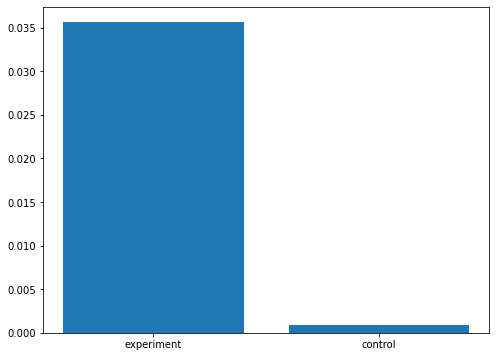

In [14]:
plt.figure(figsize=(8, 6))
plt.bar(time_dist_circle.index, time_dist_circle["Circle of radius 3mm"])
plt.show()

# Statistics

In [15]:
time_frame = 1 # in second

stats_1 = motra.stats(arena_1, time_frame=1)
stats_1["distance (mm)"] = motra.convert_to_mm(stats_1["distance"], radius=radius_1)
stats_1["velocity (mm per second)"] = motra.convert_to_mm(stats_1["velocity (per second)"], radius=radius_1)
stats_1.head()

,fly_id,timestamp,pos x,pos y,distance,velocity (per second),distance (mm),velocity (mm per second)
0,1,0.0,783.857741,542.569038,NaN,NaN,NaN,NaN
1,1,1.0,783.473684,542.570850,4.235708,4.235708,0.336847,0.336847
2,1,2.0,783.455285,542.540650,4.659963,4.659963,0.370586,0.370586
3,1,3.0,783.338776,542.436735,2.582657,2.582657,0.205387,0.205387
4,1,4.0,783.546939,542.424490,2.155243,2.155243,0.171397,0.171397


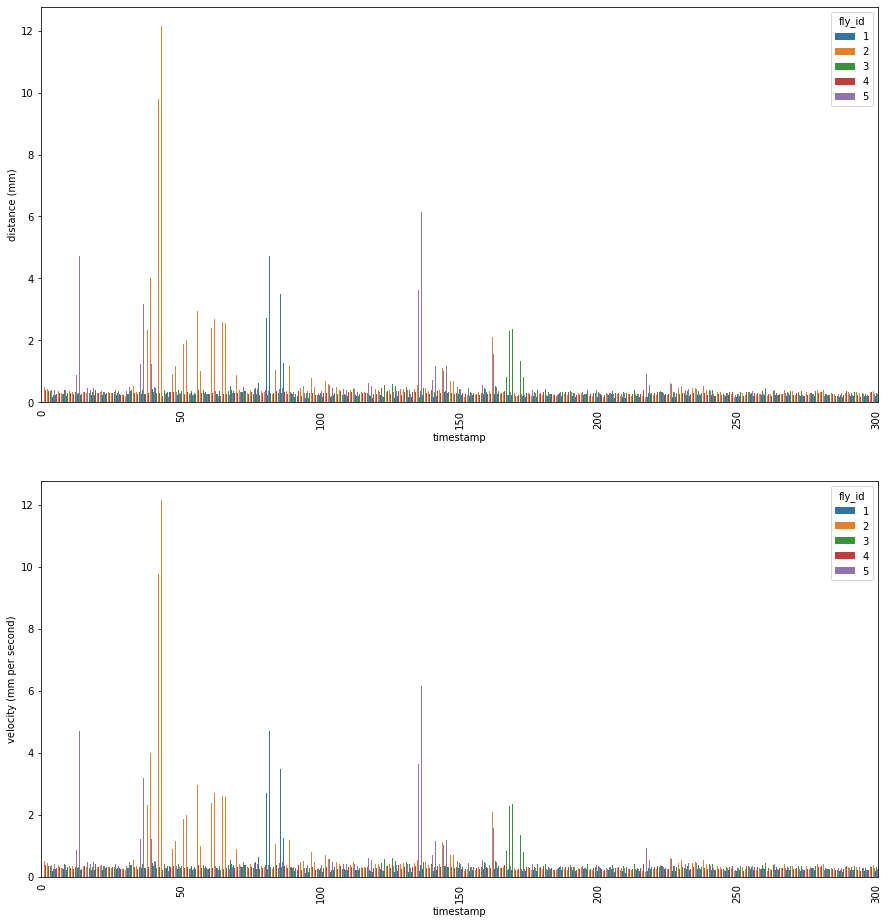

In [16]:
motra.visualize_stats(motra.sample_by_fly(stats_1, seconds=10), figsize=(15, 16), x_label_freq=30)

In [17]:
print( "on average, in {} seconds, a fly in arena 1 travels {} mm".format(time_frame, stats_1["distance (mm)"].mean()) )

on average, in 1 seconds, a fly in arena 1 travels 0.4658995804850979 mm


In [26]:
print( "on average, a fly in arena 1 travels {} mm in total".format(stats_1.groupby("fly_id")["distance (mm)"].sum().mean()) )

on average, a fly in arena 1 travels 607.0671533720827 mm in total


In [29]:
time_frame = 3

stats_2 = motra.stats(arena_2, time_frame=3)
stats_2["distance (mm)"] = motra.convert_to_mm(stats_2["distance"], radius=radius_2)
stats_2["velocity (mm per second)"] = motra.convert_to_mm(stats_2["velocity (per second)"], radius=radius_2)
stats_2.head()

,fly_id,timestamp,pos x,pos y,distance,velocity (per second),distance (mm),velocity (mm per second)
0,6,0.0,1442.095436,666.759336,NaN,NaN,NaN,NaN
1,6,3.0,1447.276515,753.602273,120.511020,40.170340,9.731865,3.243955
2,6,6.0,1270.661017,643.983051,248.979644,82.993215,20.106346,6.702115
3,6,9.0,1156.237443,614.406393,130.414887,43.471629,10.531651,3.510550
4,6,12.0,1170.775100,488.445783,180.383984,60.127995,14.566905,4.855635


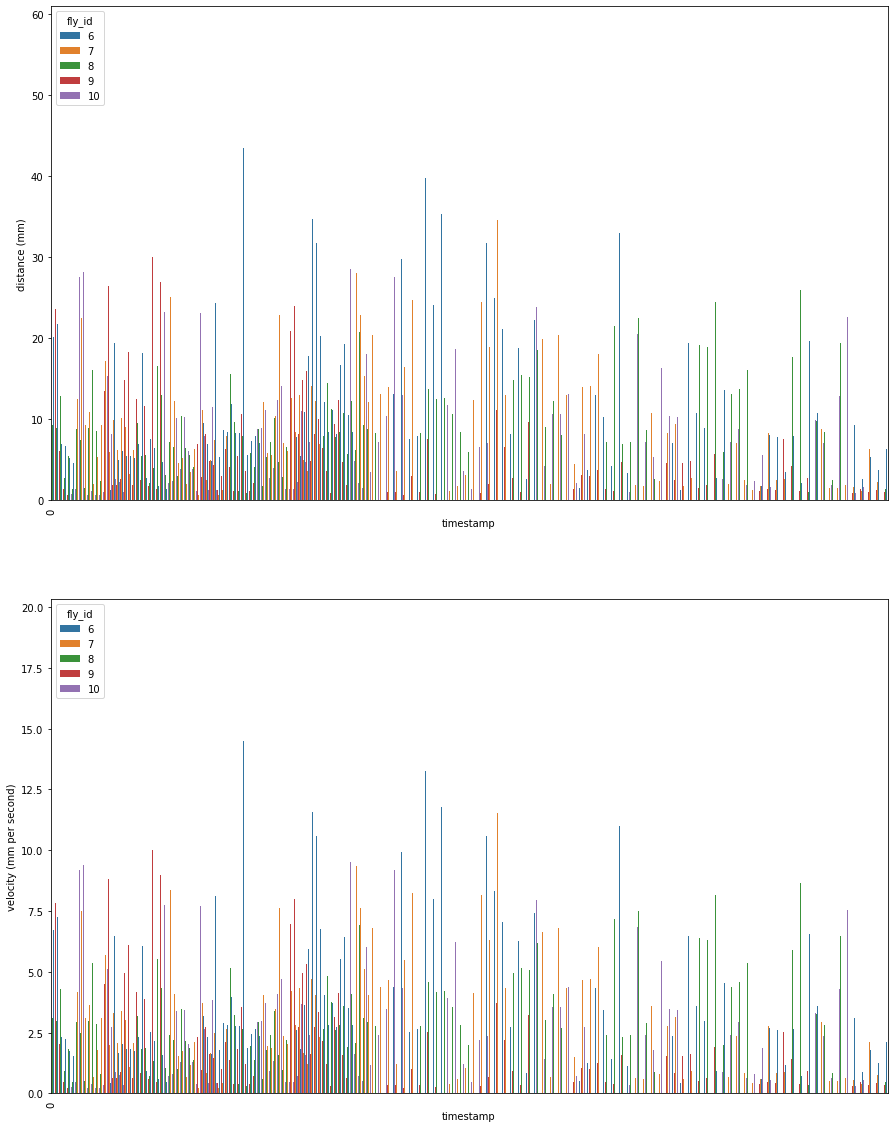

In [30]:
motra.visualize_stats(stats_2)

In [31]:
print( "on average, in {} seconds, a fly in arena 2 travels {} mm".format(time_frame, stats_2["distance (mm)"].mean()) )

on average, in 3 seconds, a fly in arena 2 travels 8.988799292456648 mm


In [32]:
print( "on average, a fly in arena 2 travels {} mm in total".format(stats_2.groupby("fly_id")["distance (mm)"].sum().mean()) )

on average, a fly in arena 2 travels 3901.1388929261907 mm in total


# Animation

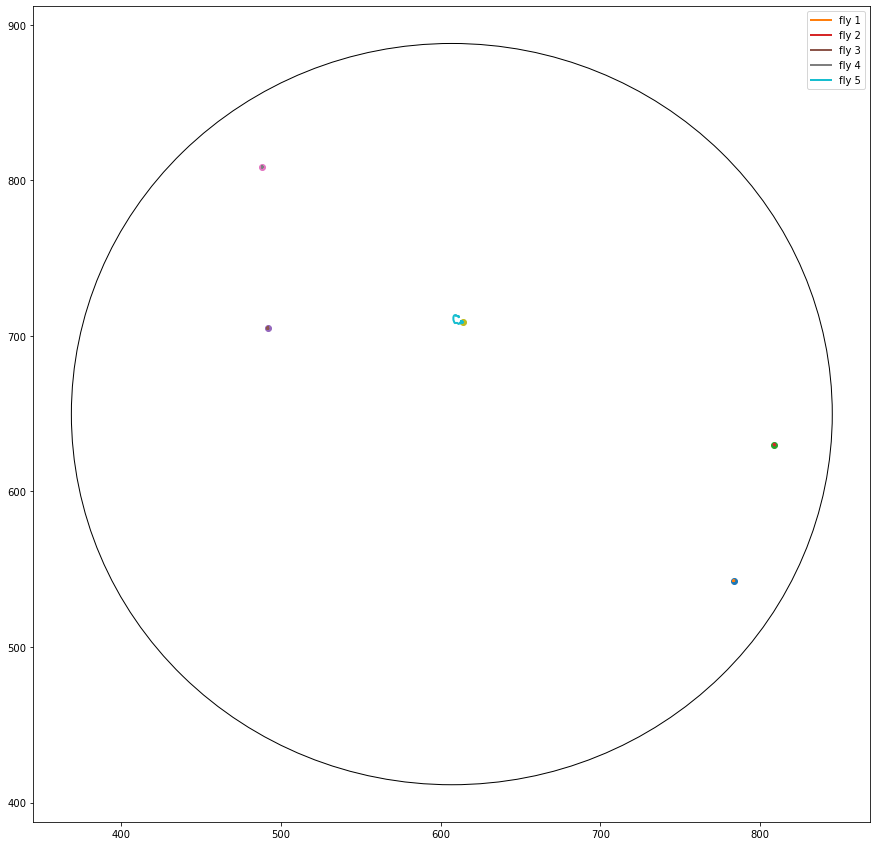

In [ ]:
motra.fly_animation(fly[fly["fly_id"] <= 5], result_video_path="animation/sample_arena_1.mp4", video_size=10)

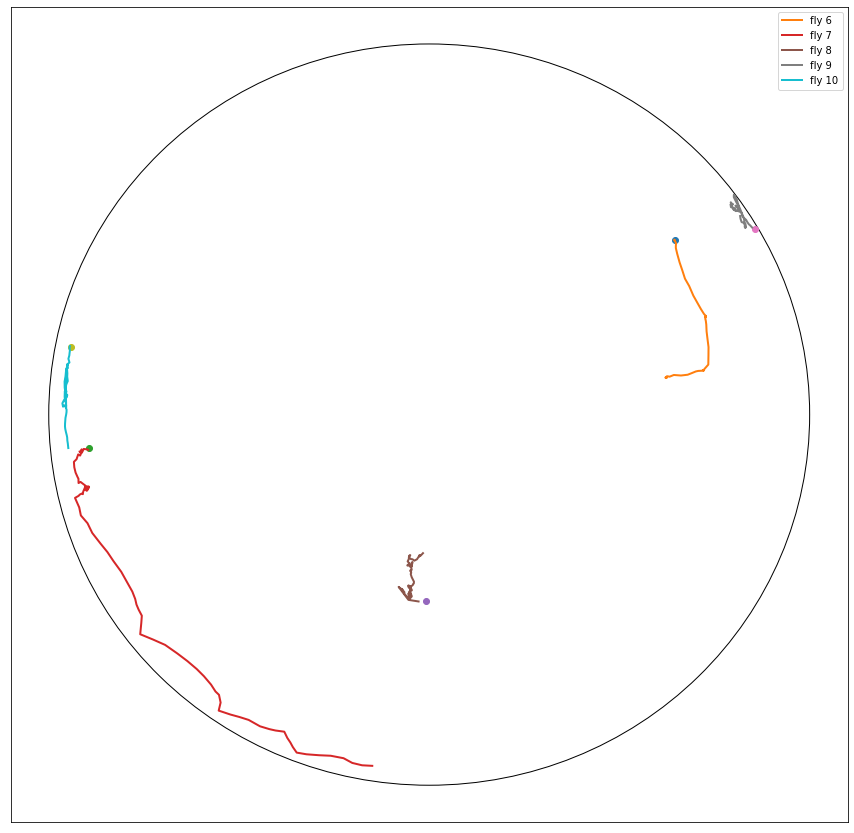

In [ ]:
motra.fly_animation(fly[fly["fly_id"] > 5], result_video_path="animation/sample_arena_2.mp4", video_size=3)